In [1]:
import mne
import numpy as np

In [2]:
sbj='002'
rec='03'
edf_loc= '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
Data = mne.io.read_raw_edf(edf_loc)
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id, tmin=0, tmax=4, baseline=(None,None))

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S002/S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


onset = 
duration = 
desciption = 
my_ann = mne.Annotations(onset, duration, description)

In [3]:
onset = []
duration = []
description = []

for i in range(len(events)-1):
    if events[i, 2] == 1:
        continue
    elif events[i, 2] == 2:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        duration.append(events[i+1][0]-events[i-1][0])
        description.append('T1')
        continue
    elif events[i, 2] == 3:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        duration.append(events[i+1][0]-events[i-1][0])
        description.append('T2')
        continue

0
1312
2624
3936
5248
6560
7872
9184
10496
11808
13120
14432
15744
17056


In [4]:
print(onset)
print(np.array(onset)/160)
print(np.array(duration)/160)

[0, 1312, 2624, 3936, 5248, 6560, 7872, 9184, 10496, 11808, 13120, 14432, 15744, 17056]
[  0.    8.2  16.4  24.6  32.8  41.   49.2  57.4  65.6  73.8  82.   90.2
  98.4 106.6]
[8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2]


In [5]:
onset = np.array(onset)/160
duration = np.array(duration)/160
my_ann = mne.Annotations(onset, duration, description)
print(my_ann)

<Annotations | 14 segments: T1 (7), T2 (7)>


In [6]:
Data.set_annotations(my_ann)

<RawEDF | S002R03.edf, 64 x 19680 (123.0 s), ~130 kB, data not loaded>

In [7]:
events, event_id=mne.events_from_annotations(Data)

epochs=mne.Epochs(Data, events, event_id=event_id,  baseline=(None,None))

Used Annotations descriptions: ['T1', 'T2']
14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [8]:
T1=epochs['T1']
T2=epochs['T2']

In [9]:
T1

<Epochs  |   7 events (good & bad), -0.2 - 0.5 sec, baseline [None, None], ~130 kB, data not loaded,
 'T1': 7>

In [10]:
montage = mne.channels.make_standard_montage('standard_1020')

In [11]:
print(montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


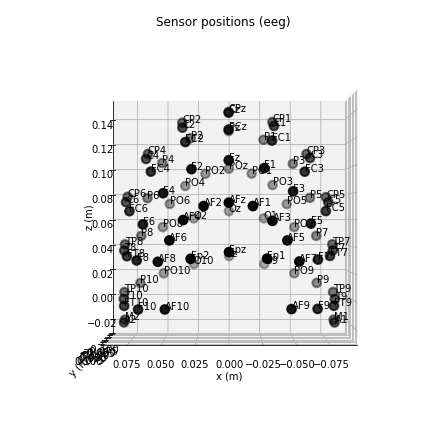

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


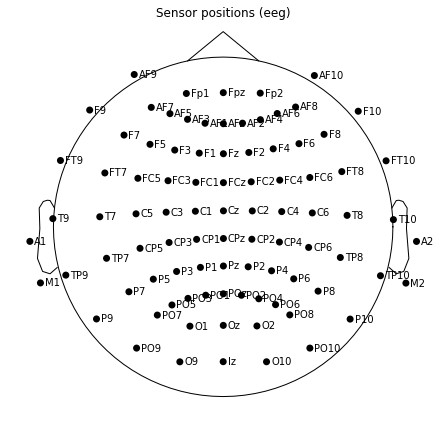

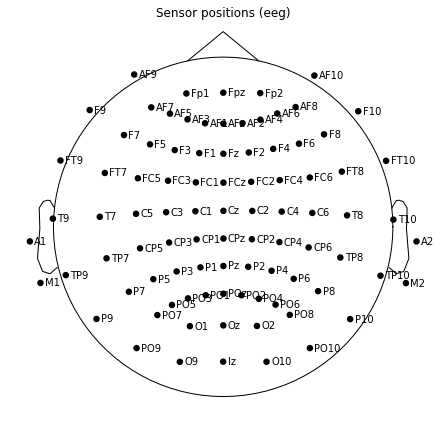

In [21]:
fig = montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
montage.plot(kind='topomap', show_names=True)

In [12]:
ch= ['FC5',
     'FC3',
     'FC1',
     'FCz',
     'FC2',
     'FC4',
     'FC6',
     'C5',
     'C3',
     'C1',
     'Cz',
     'C2',
     'C4',
     'C6',
     'CP5',
     'CP3',
     'CP1',
     'CPz',
     'CP2',
     'CP4',
     'CP6',
     'Fp1',
     'Fpz',
     'Fp2',
     'AF7',
     'AF3',
     'AFz',
     'AF4',
     'AF8',
     'F7',
     'F5',
     'F3',
     'F1',
     'Fz',
     'F2',
     'F4',
     'F6',
     'F8',
     'FT7',
     'FT8',
     'T7',
     'T8',
     'T9',
     'T10',
     'TP7',
     'TP8',
     'P7',
     'P5',
     'P3',
     'P1',
     'Pz',
     'P2',
     'P4',
     'P6',
     'P8',
     'PO7',
     'PO3',
     'POz',
     'PO4',
     'PO8',
     'O1',
     'Oz',
     'O2',
     'Iz' ]

In [13]:
len(ch)

64

In [14]:
j=0
for i in ch:
    Data.ch_names[j]=i;
    j=j+1
print(j)


64


In [15]:
Data.info

<Info | 7 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

Data.info['ch_names'] = [chn.strip('.') for chn in Data.info['ch_names']]

In [16]:
Data.ch_names

['FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'Fp1',
 'Fpz',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'AF4',
 'AF8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FT8',
 'T7',
 'T8',
 'T9',
 'T10',
 'TP7',
 'TP8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'O1',
 'Oz',
 'O2',
 'Iz']

In [18]:
Data.set_montage(montage)

RuntimeError: info channel name inconsistency detected, please notify mne-python developers